# Validation notebook of Nordic system (SMIB): Stepss vs EMTP
# RMS and EMT simulation results for different scenarios

## <center> Simulation setup </center>

| | Stepss  | EMTP |
|-| :---:  | :---: |
| Domain | RMS |  EMT |
| Duration | 8s | 8s |
| Time step | 1ms (fix) |  50us |
| Solver solution method | DAE |Nodal |
| Solver integration method | Backward Differentiation Formula (order2) |Trapezoidal |

## Plotting Function

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np



In [11]:
def autoscale_y(ax,margin):
    """This function rescales the y-axis based on the data that is visible given the current xlim of the axis.
    ax -- a matplotlib axes object
    margin -- the fraction of the total height of the y-data to pad the upper and lower ylims"""

    def get_bottom_top(line):
        xd = line.get_xdata()
        yd = line.get_ydata()
        lo,hi = ax.get_xlim()
        y_displayed = yd[((xd>lo) & (xd<hi))]
        h = np.max(y_displayed) - np.min(y_displayed)
        bot = np.min(y_displayed)-margin*h
        top = np.max(y_displayed)+margin*h
        return bot,top

    lines = ax.get_lines()
    bot,top = np.inf, -np.inf

    for line in lines:
        new_bot, new_top = get_bottom_top(line)
        if new_bot < bot: bot = new_bot
        if new_top > top: top = new_top

    ax.set_ylim(bot,top)

In [12]:
def plot_results(scenario, stepss_file, emtp_file):
    plt.rc('font', family='serif', serif='Times New Roman')
    plt.rc('text', usetex=True) 

    stepss = pd.read_csv(stepss_file, sep = '\s+', comment=";", keep_default_na=False, names=('time',  'VtG6', 'VtG7', 'VtG10', 'VtG17', 'Vt1041', 'Vt1042', 'Vt1012', 'Vt1062'))
    #emtp = pd.read_csv(emtp_file, sep = '\s+', comment=";", keep_default_na=False, names=('time',  'P_MW', 'RotorSpeed', 'Vf', 'Vt'))
    emtp= pd.read_csv(emtp_file, sep = '\t', low_memory=False)
    emtp.drop(index=emtp.index[0], axis=0, inplace=True)
    emtp.rename(columns=lambda x: x.strip(), inplace=True)

    stepss_variables= [ "VtG6", "VtG7", "VtG10", "VtG17", "Vt1041", "Vt1042", "Vt1012", "Vt1062"]
    #emtp_variables= ["P_pu",  "Rotor_speed","Vf", "Vt"]
    emtp_variables= ['G6/VtG6', 'G7/VtG7', 'G10/VtG10', 'G17/VtG17','V1041', '1042', '4012', '4062']
    
    labels=[ "VtG6", "VtG7", "VtG10", "VtG17", "Vt1041", "Vt1042", "Vt1012", "Vt1062"]
   
    plt.close('all')
    fig=plt.figure(figsize=(15, 12))
    #plt.suptitle(scenario , fontsize=20)
    plt.subplots_adjust(top=0.9, hspace=0.4, wspace=0.4)
    plt.tight_layout()
    line_width=4
    for n, (x, y,  l) in enumerate(zip(stepss_variables, emtp_variables, labels)):
        ax = plt.subplot(4, 2, n + 1)
        ax.plot(stepss['time'], stepss[x], color= 'black', linestyle='-', label='STEPSS',linewidth=4)   
        ax.plot(pd.to_numeric(emtp['X axis'][::2]), pd.to_numeric(emtp[y][::2]), color= 'red', linestyle=':', label='EMTP', linewidth=4)
        
        #ax.set_title(l, fontname='Times New Roman', fontsize=16)
        ax.set_xlabel('Time', fontname='Times New Roman', fontsize=20, fontweight='bold')
        ax.set_ylabel(l, fontname='Times New Roman', fontsize=20, fontweight='bold')
        ax.tick_params(axis='both', which='major',labelsize=20)
        ax.tick_params(axis='both', which='minor', labelsize=20)
        ax.legend(fontsize=20,  loc="lower right")
        #ax.legend(fontsize=20,loc="upper right")
        ax.set_xlim([0.5, 15])
        #ax.set_ylim([0.6, 1.1])

    plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjust layout to make room for the title
    plt.savefig('plot_results.jpg', format='jpg', dpi=300)
    plt.savefig('plot_results.pdf', format='pdf')
    plt.show()

        # if ax.get_title() in ["P (MW)"]:
        #     autoscale_y(ax, 0.1)
        # else:
        #     autoscale_y(ax, 0.1)

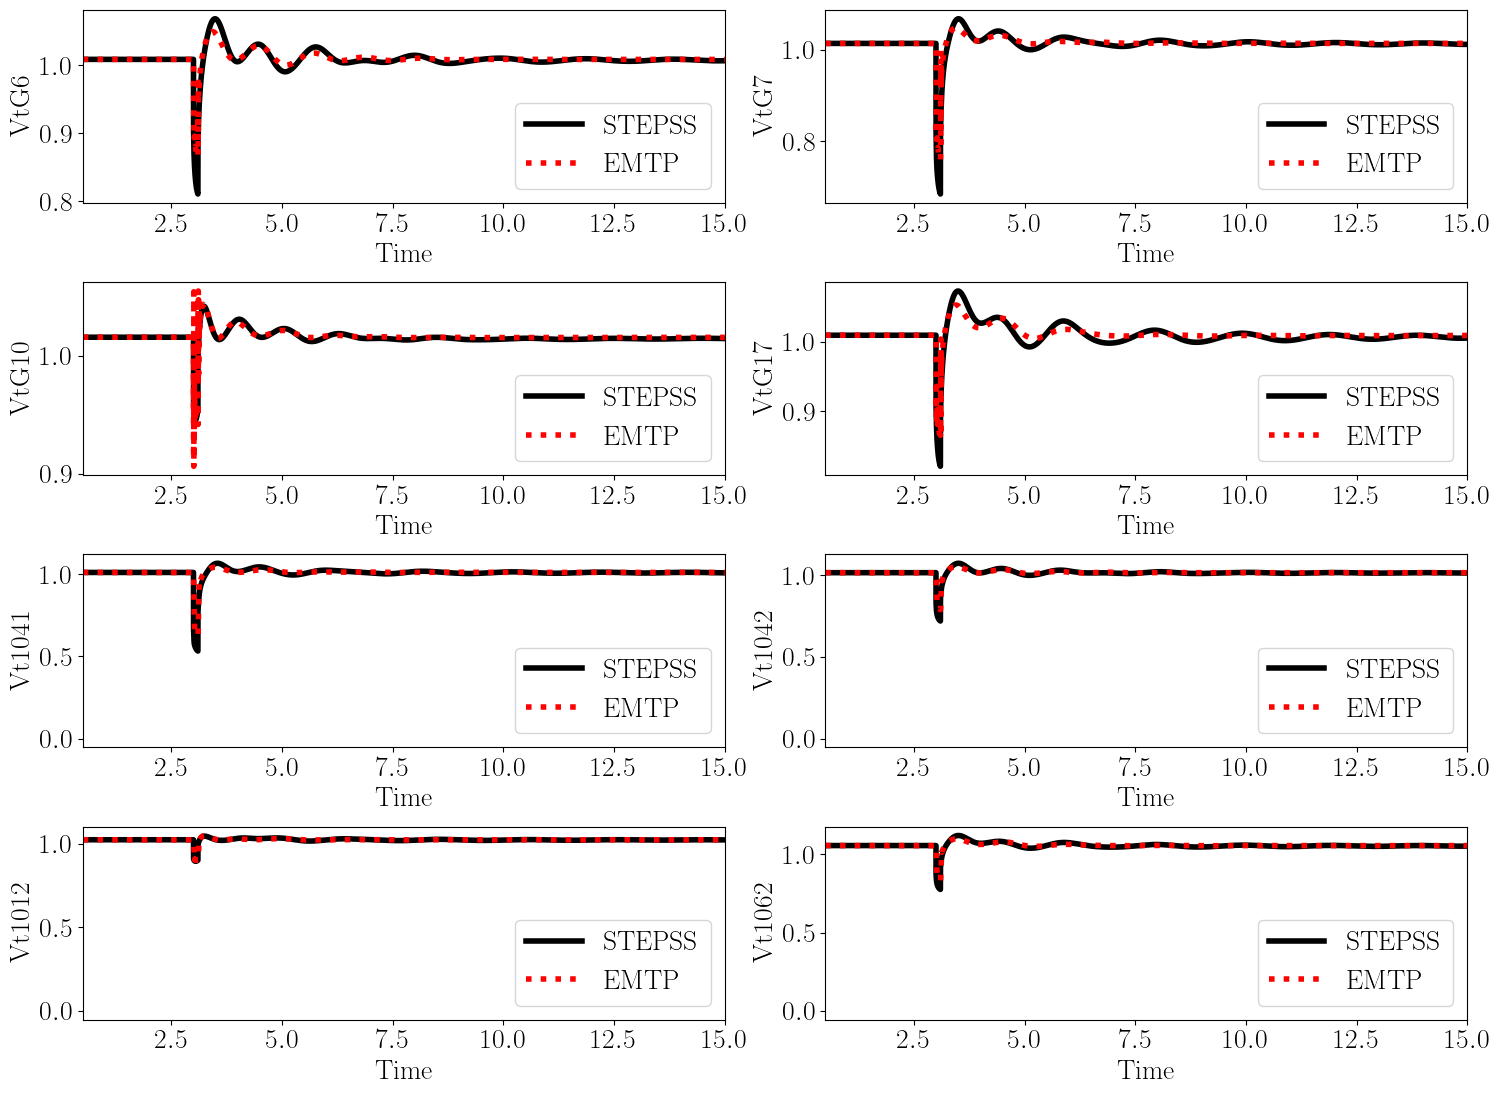

In [13]:
dir_path1 = r"C:\Users\rashmiprasad\OneDrive - Delft University of Technology\Desktop\Nodic\Thierry\SMNordic\UnSaturated\STEPSS\VtFaultSTEPSS.cur"
dir_path2 = r"C:\Users\rashmiprasad\OneDrive - Delft University of Technology\Desktop\Nodic\Thierry\SMNordic\UnSaturated\EMTP\VtUnSatFaultEMTP.txt"
#dir_path1 = r"C:\Users\rashmiprasad\OneDrive - Delft University of Technology\Desktop\Nodic\Thierry\SMNordic\UnSaturated\STEPSS\VtSTEPSS.cur"
#dir_path2 = r"C:\Users\rashmiprasad\OneDrive - Delft University of Technology\Desktop\Nodic\Thierry\SMNordic\UnSaturated\EMTP\VtUnSatFaultLineBreakEMTP.txt"
plot_results('Terminal Voltage',dir_path1, dir_path2)

In [14]:
def plot_results(scenario, stepss_file, emtp_file):
    plt.rc('font', family='serif', serif='Times New Roman')
    plt.rc('text', usetex=True) 

    stepss = pd.read_csv(stepss_file, sep = '\s+', comment=";", keep_default_na=False, names=('time',  'wrG6', 'wrG7', 'wrG17', 'wrG20'))
    #emtp = pd.read_csv(emtp_file, sep = '\s+', comment=";", keep_default_na=False, names=('time',  'P_MW', 'RotorSpeed', 'Vf', 'Vt'))
    emtp= pd.read_csv(emtp_file, sep = '\t', low_memory=False)
    emtp.drop(index=emtp.index[0], axis=0, inplace=True)
    emtp.rename(columns=lambda x: x.strip(), inplace=True)

    stepss_variables= [ "wrG6", "wrG7", "wrG17", "wrG20"]
    #emtp_variables= ["P_pu",  "Rotor_speed","Vf", "Vt"]
    emtp_variables= ['G6/Omega_1_SM6', 'G7/Omega_1_SM7', 'G17/Omega_1_SM17', 'G20/Omega_1_SM20']
    
    labels=[ "rotor speed-G6", "rotor speed-G7", "rotor speed-G17", "rotor speed-G20"]
   
    plt.close('all')
    fig=plt.figure(figsize=(15, 12))
    #plt.suptitle(scenario , fontsize=20)
    plt.subplots_adjust(top=0.9, hspace=0.4, wspace=0.4)
    plt.tight_layout()
    line_width=4
    for n, (x, y,  l) in enumerate(zip(stepss_variables, emtp_variables, labels)):
        ax = plt.subplot(4, 1, n + 1)
        ax.plot(stepss['time'], stepss[x], color= 'black', linestyle='-', label='STEPSS',linewidth=4)         
        ax.plot(pd.to_numeric(emtp['X axis'][::2]), pd.to_numeric(emtp[y][::2]), color= 'red', linestyle=':', label='EMTP', linewidth=4)
        
        #ax.set_title(l, fontname='Times New Roman', fontsize=16)
        ax.set_xlabel('Time', fontname='Times New Roman', fontsize=20, fontweight='bold')
        ax.set_ylabel(l, fontname='Times New Roman', fontsize=20, fontweight='bold')
        ax.tick_params(axis='both', which='major',labelsize=20)
        ax.tick_params(axis='both', which='minor', labelsize=20)
        ax.legend(fontsize=20,  loc="lower right")
        #ax.legend(fontsize=20,loc="upper right")
        ax.set_xlim([0.5, 15])
        #ax.set_ylim([0.6, 1.1])

    plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjust layout to make room for the title
    plt.savefig('plot_results.jpg', format='jpg', dpi=300)
    plt.savefig('plot_results.pdf', format='pdf')
    plt.show()

        # if ax.get_title() in ["P (MW)"]:
        #     autoscale_y(ax, 0.1)
        # else:
        #     autoscale_y(ax, 0.1)

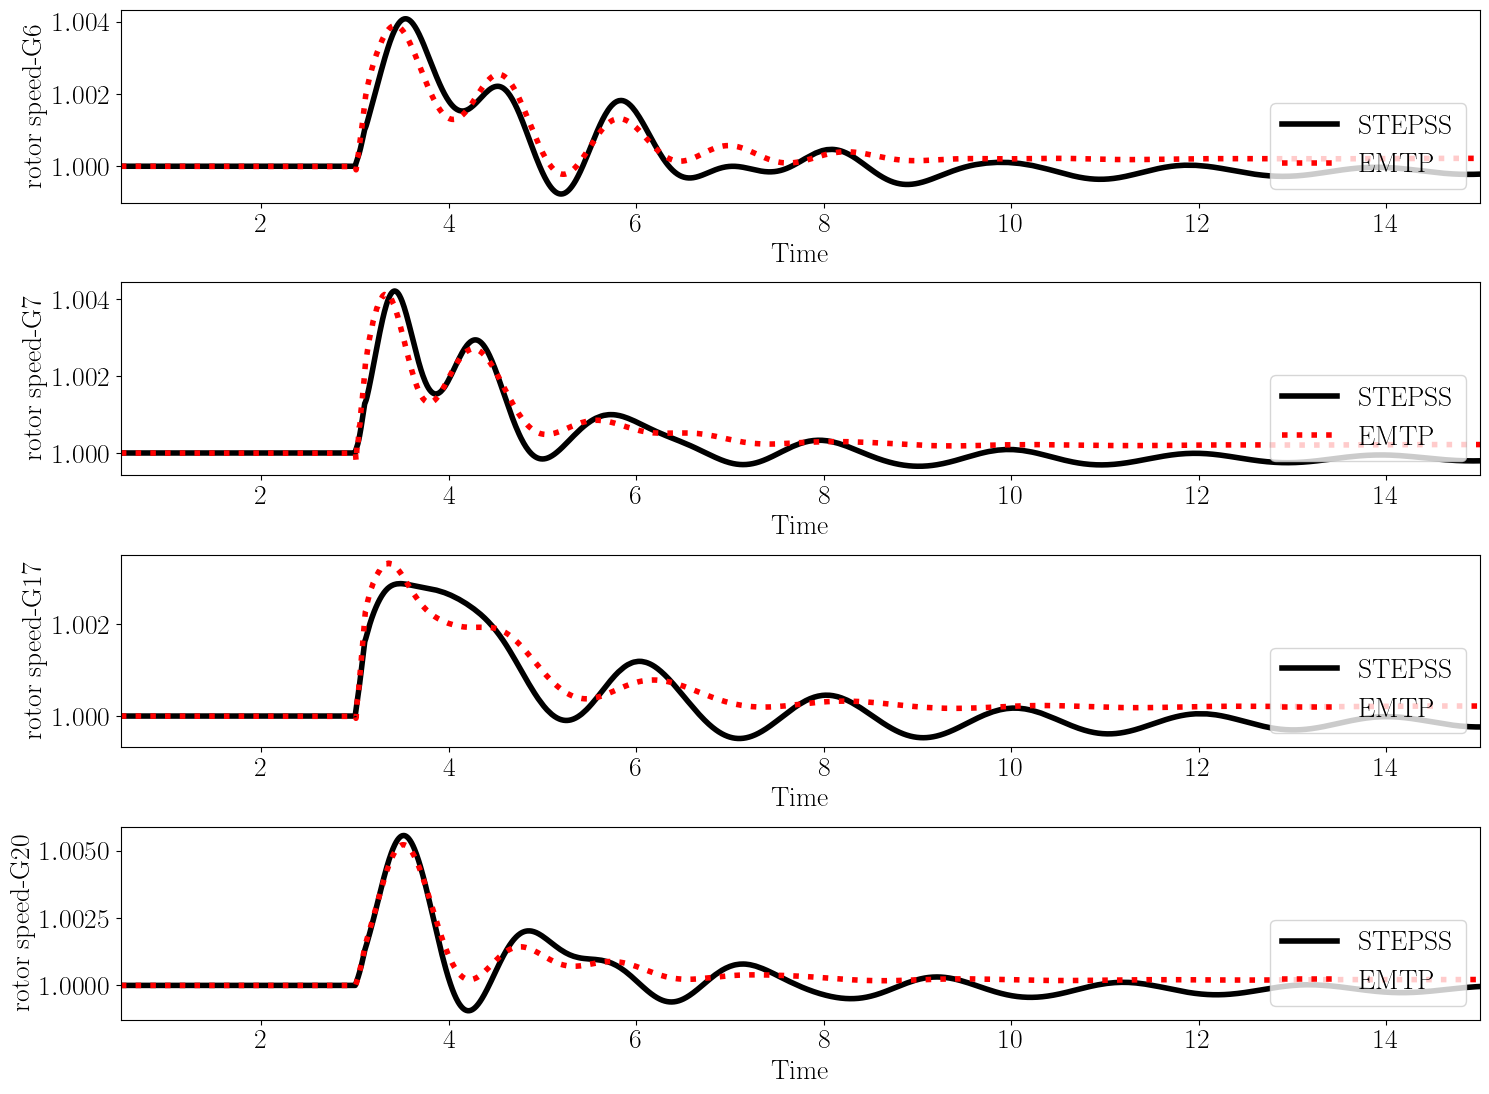

In [15]:
dir_path1 = r"C:\Users\rashmiprasad\OneDrive - Delft University of Technology\Desktop\Nodic\Thierry\SMNordic\UnSaturated\STEPSS\wrFaultSTEPSS.cur"
dir_path2 = r"C:\Users\rashmiprasad\OneDrive - Delft University of Technology\Desktop\Nodic\Thierry\SMNordic\UnSaturated\EMTP\wrUnSatFaultEMTP.txt"
#dir_path1 = r"C:\Users\rashmiprasad\OneDrive - Delft University of Technology\Desktop\Nodic\Thierry\SMNordic\UnSaturated\STEPSS\wrSTEPSS.cur"
#dir_path2 = r"C:\Users\rashmiprasad\OneDrive - Delft University of Technology\Desktop\Nodic\Thierry\SMNordic\UnSaturated\EMTP\wrUnSatFaultLineBreakEMTP.txt"
plot_results('Rotor Speed',dir_path1, dir_path2)

In [16]:
def plot_results(scenario, stepss_file, emtp_file):
    plt.rc('font', family='serif', serif='Times New Roman')
    plt.rc('text', usetex=True) 

    stepss = pd.read_csv(stepss_file, sep = '\s+', comment=";", keep_default_na=False, names=('time',  'PeG6', 'PeG7', 'PeG17', 'PeG20'))
    #emtp = pd.read_csv(emtp_file, sep = '\s+', comment=";", keep_default_na=False, names=('time',  'P_MW', 'RotorSpeed', 'Vf', 'Vt'))
    emtp= pd.read_csv(emtp_file, sep = '\t', low_memory=False)
    emtp.drop(index=emtp.index[0], axis=0, inplace=True)
    emtp.rename(columns=lambda x: x.strip(), inplace=True)

    stepss_variables= [ "PeG6", "PeG7", "PeG17", "PeG20"]
    #emtp_variables= ["P_pu",  "Rotor_speed","Vf", "Vt"]
    emtp_variables= ['G6/Pe_SM6', 'G7/Pe_SM7', 'G17/Pe_SM17', 'G20/Pe_SM20']
    
    labels=[ "Active Power-G6", "Active Power-G7", "Active Power-G17", "Active Power-G20"]
   
    plt.close('all')
    fig=plt.figure(figsize=(15, 12))
    #plt.suptitle(scenario , fontsize=20)
    plt.subplots_adjust(top=0.9, hspace=0.4, wspace=0.4)
    plt.tight_layout()
    line_width=4
    for n, (x, y,  l) in enumerate(zip(stepss_variables, emtp_variables, labels)):
        ax = plt.subplot(4, 1, n + 1)
        ax.plot(stepss['time'], stepss[x], color= 'black', linestyle='-', label='STEPSS',linewidth=4)         
        ax.plot(pd.to_numeric(emtp['X axis'][::2]), pd.to_numeric(emtp[y][::2]), color= 'red', linestyle=':', label='EMTP', linewidth=4)
        
        #ax.set_title(l, fontname='Times New Roman', fontsize=16)
        ax.set_xlabel('Time', fontname='Times New Roman', fontsize=20, fontweight='bold')
        ax.set_ylabel(l, fontname='Times New Roman', fontsize=20, fontweight='bold')
        ax.tick_params(axis='both', which='major',labelsize=20)
        ax.tick_params(axis='both', which='minor', labelsize=20)
        ax.legend(fontsize=20,  loc="lower right")
        #ax.legend(fontsize=20,loc="upper right")
        ax.set_xlim([0.5, 15])
        #ax.set_ylim([0.6, 1.1])

    plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjust layout to make room for the title
    plt.savefig('plot_results.jpg', format='jpg', dpi=300)
    plt.savefig('plot_results.pdf', format='pdf')
    plt.show()

        # if ax.get_title() in ["P (MW)"]:
        #     autoscale_y(ax, 0.1)
        # else:
        #     autoscale_y(ax, 0.1)

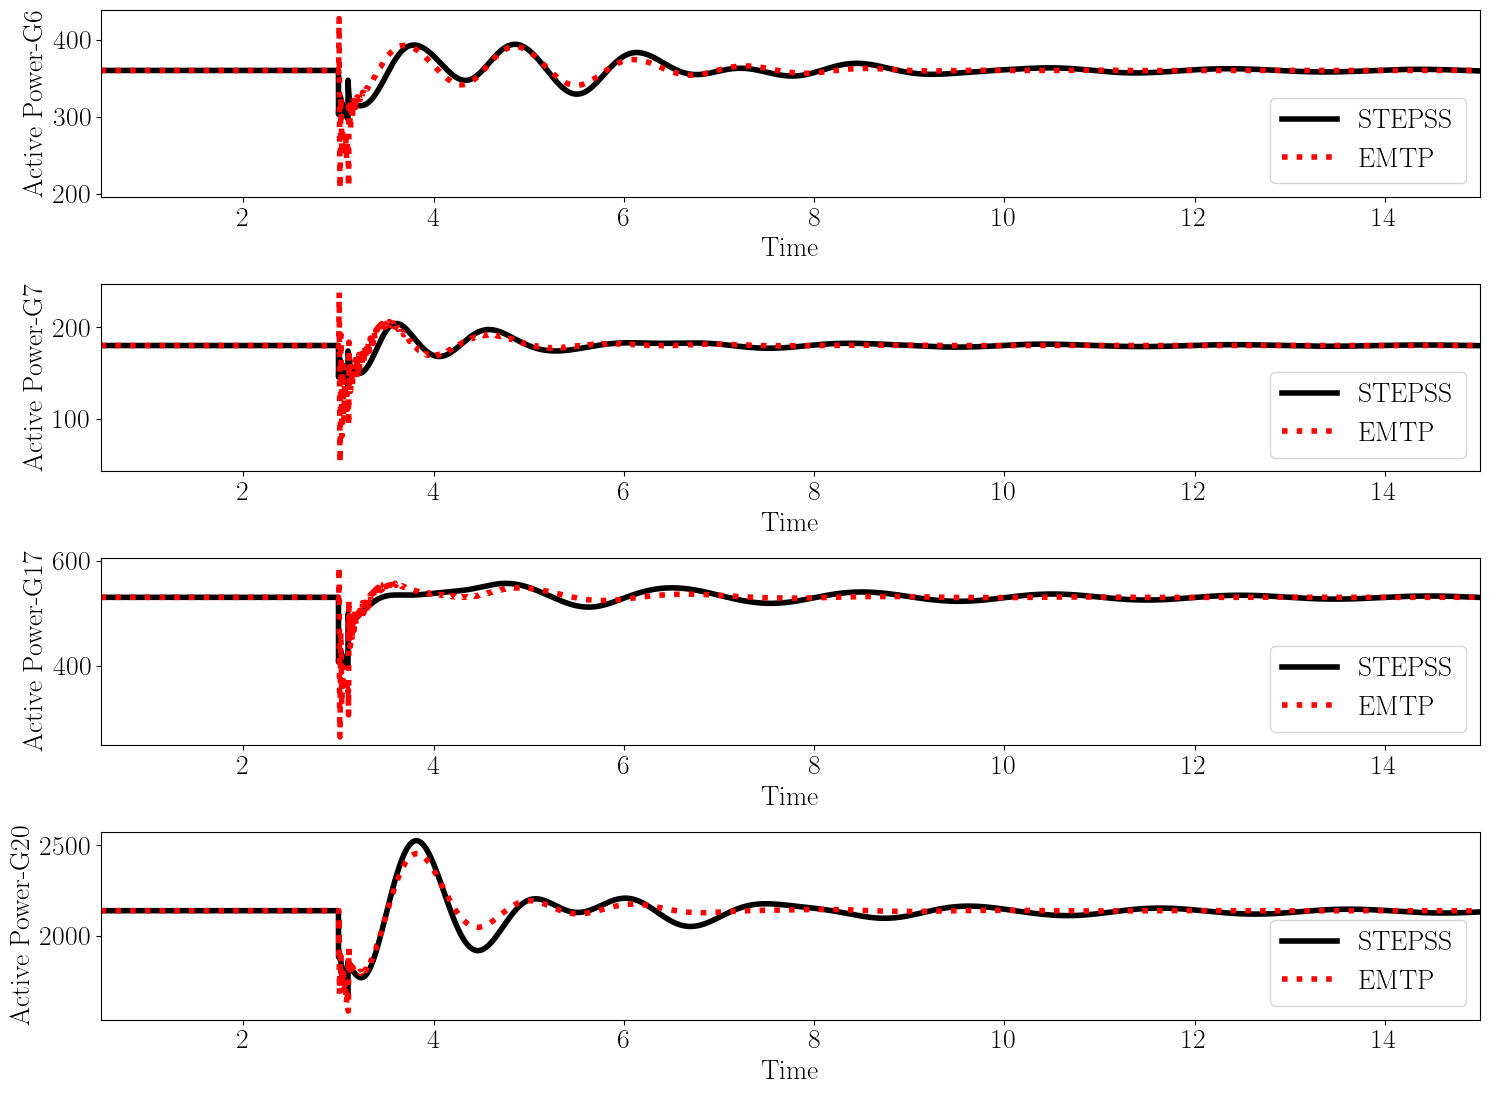

In [17]:
dir_path1 = r"C:\Users\rashmiprasad\OneDrive - Delft University of Technology\Desktop\Nodic\Thierry\SMNordic\UnSaturated\STEPSS\PeFaultSTEPSS.cur"
dir_path2 = r"C:\Users\rashmiprasad\OneDrive - Delft University of Technology\Desktop\Nodic\Thierry\SMNordic\UnSaturated\EMTP\PeUnSatFaultEMTP.txt"
#dir_path1 = r"C:\Users\rashmiprasad\OneDrive - Delft University of Technology\Desktop\Nodic\Thierry\SMNordic\UnSaturated\STEPSS\PeSTEPSS.cur"
#dir_path2 = r"C:\Users\rashmiprasad\OneDrive - Delft University of Technology\Desktop\Nodic\Thierry\SMNordic\UnSaturated\EMTP\PeUnSatFaultLineBreakEMTP.txt"
plot_results('Active Power',dir_path1, dir_path2)

In [18]:
def plot_results(scenario, stepss_file, emtp_file):
    plt.rc('font', family='serif', serif='Times New Roman')
    plt.rc('text', usetex=True) 

    stepss = pd.read_csv(stepss_file, sep = '\s+', comment=";", keep_default_na=False, names=('time',  'VfG6', 'VfG7', 'VfG8', 'VfG9', 'VfG11', 'VfG12', 'VfG14', 'VfG15','VfG16','VfG18','VfG20'))
    #emtp = pd.read_csv(emtp_file, sep = '\s+', comment=";", keep_default_na=False, names=('time',  'P_MW', 'RotorSpeed', 'Vf', 'Vt'))
    emtp= pd.read_csv(emtp_file, sep = '\t', low_memory=False)
    emtp.drop(index=emtp.index[0], axis=0, inplace=True)
    emtp.rename(columns=lambda x: x.strip(), inplace=True)

    stepss_variables= [ "VfG6", "VfG7", "VfG8", "VfG9", "VfG11", "VfG12", "VfG14", "VfG15","VfG16", "VfG18", "VfG20"]
    #emtp_variables= ["P_pu",  "Rotor_speed","Vf", "Vt"]
    emtp_variables= ['G6/Vf_SM6', 'G7/Vf_SM7', 'G8/Vf_SM8', 'G9/Vf_SM9', 'G11/Vf_SM11', 'G12/Vf_SM12', 'G14/Vf_SM14','G15/Vf_SM15', 'G16/Vf_SM16', 'G18/Vf_SM18','G20/Vf_SM20']
    
    labels=[ "VfG6", "VfG7", "VfG8", "VfG9", "VfG11", "VfG12", "VfG14", "VfG15","VfG16", "VfG18", "VfG20"]
   
    plt.close('all')
    fig=plt.figure(figsize=(15, 12))
    #plt.suptitle(scenario , fontsize=20)
    plt.subplots_adjust(top=0.9, hspace=0.4, wspace=0.4)
    plt.tight_layout()
    line_width=4
    for n, (x, y,  l) in enumerate(zip(stepss_variables, emtp_variables, labels)):
        ax = plt.subplot(6, 2, n + 1)
        ax.plot(stepss['time'], stepss[x], color= 'black', linestyle='-', label='STEPSS',linewidth=4)  
        cf= stepss[x][100]      
        sf=cf/pd.to_numeric(emtp[y][100])
        ax.plot(pd.to_numeric(emtp['X axis'][::1]), pd.to_numeric(emtp[y][::1])*sf, color= 'red', linestyle=':', label='EMTP', linewidth=4)   
        #ax.plot(pd.to_numeric(emtp['X axis'][::2]), pd.to_numeric(emtp[y][::2]), color= 'red', linestyle=':', label='EMTP', linewidth=4)
        
        #ax.set_title(l, fontname='Times New Roman', fontsize=16)
        ax.set_xlabel('Time', fontname='Times New Roman', fontsize=20, fontweight='bold')
        ax.set_ylabel(l, fontname='Times New Roman', fontsize=20, fontweight='bold')
        ax.tick_params(axis='both', which='major',labelsize=20)
        ax.tick_params(axis='both', which='minor', labelsize=20)
        ax.legend(fontsize=16,  loc="lower right")
        #ax.legend(fontsize=20,loc="upper right")
        ax.set_xlim([0.5, 15])
        #ax.set_ylim([0.6, 1.1])

    plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjust layout to make room for the title
    plt.savefig('plot_results.jpg', format='jpg', dpi=300)
    plt.savefig('plot_results.pdf', format='pdf')
    plt.show()

        # if ax.get_title() in ["P (MW)"]:
        #     autoscale_y(ax, 0.1)
        # else:
        #     autoscale_y(ax, 0.1)

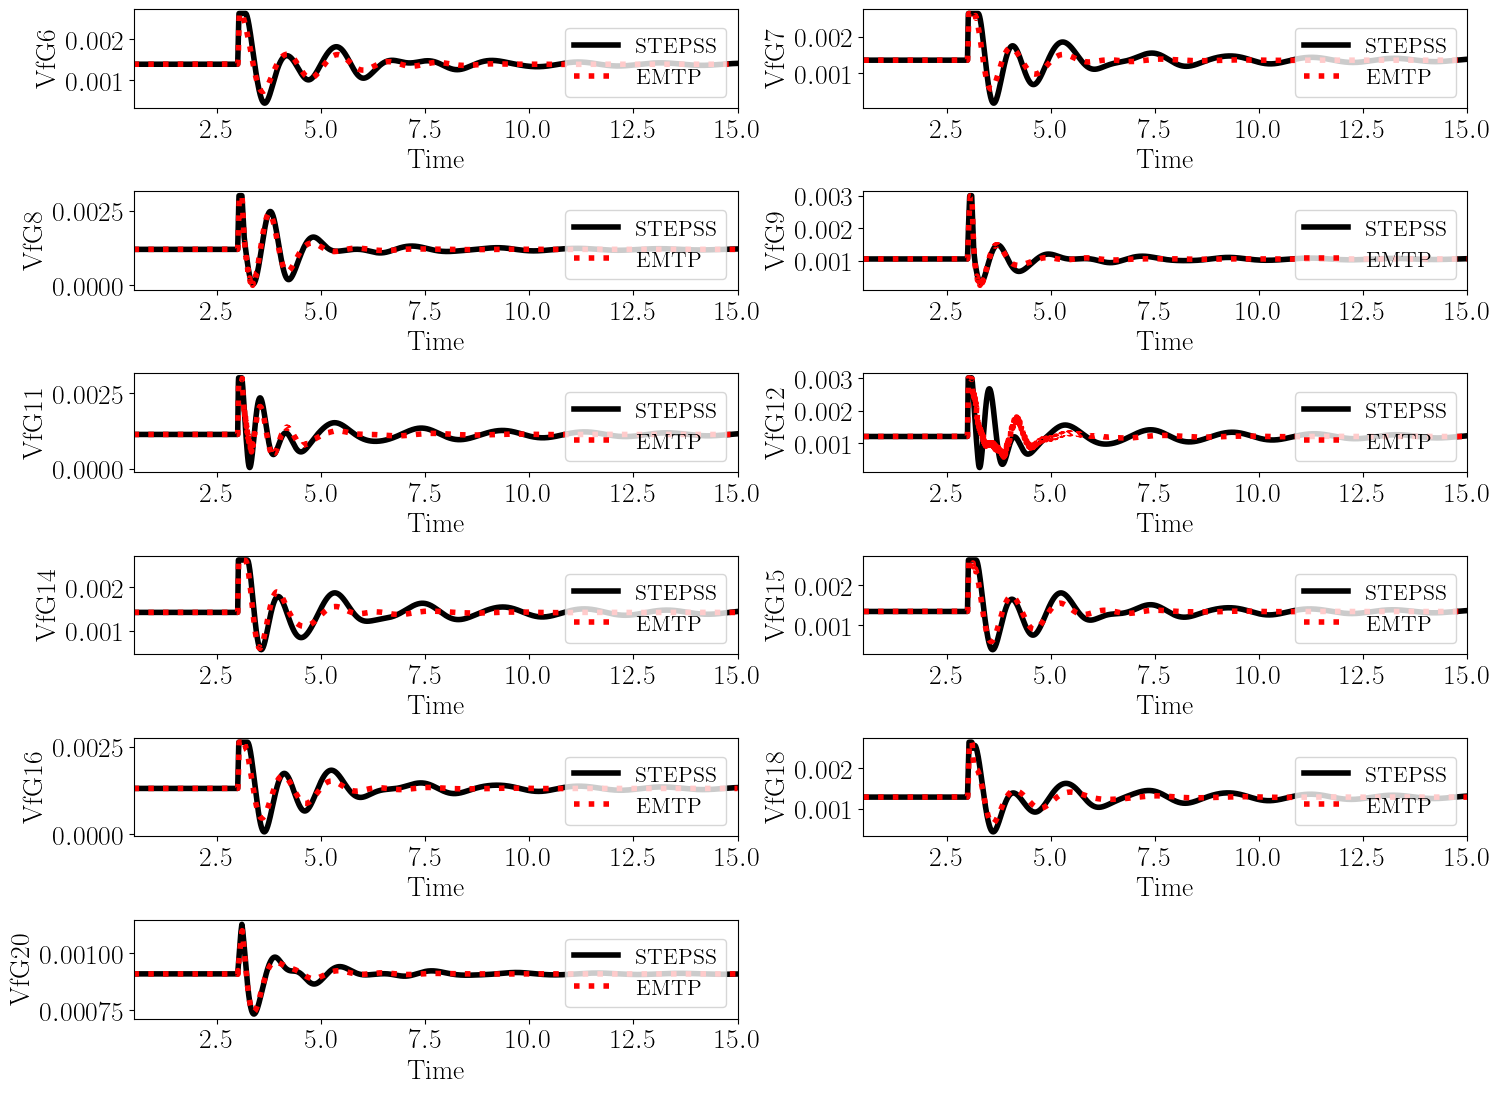

In [19]:
dir_path1 = r"C:\Users\rashmiprasad\OneDrive - Delft University of Technology\Desktop\Nodic\Thierry\SMNordic\UnSaturated\STEPSS\VfFaultSTEPSS.cur"
dir_path2 = r"C:\Users\rashmiprasad\OneDrive - Delft University of Technology\Desktop\Nodic\Thierry\SMNordic\UnSaturated\EMTP\VfUnSatFaultEMTP.txt"
#dir_path1 = r"C:\Users\rashmiprasad\OneDrive - Delft University of Technology\Desktop\Nodic\Thierry\SMNordic\UnSaturated\STEPSS\VfSTEPSS.cur"
#dir_path2 = r"C:\Users\rashmiprasad\OneDrive - Delft University of Technology\Desktop\Nodic\Thierry\SMNordic\UnSaturated\EMTP\VfUnSatFaultLineBreakEMTP.txt"
plot_results('Field Voltage',dir_path1, dir_path2)